In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [2]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)
print('Matplotlib Version',matplotlib.__version__)

Numpy Version 1.24.3
Pandas Version 1.5.3
Seaborn Version 0.12.2
Matplotlib Version 3.7.1


In [3]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [4]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [5]:
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster

In [6]:
df= pd.read_csv('data.csv')

### 1) Introduction of the business problem  ------> Please refer to Business report

## 2.	Data Report:
 
### a) Understanding how data was collected in terms of time, frequency and methodology	

In [7]:
df.head(10)

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,...,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salried,2,125 to 150,4866,28,1,...,Unknown,NaN,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411,50,0,...,formerly smoked,NaN,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509,68,0,...,formerly smoked,NaN,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214,51,0,...,Unknown,NaN,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938,44,0,...,never smoked,2004.0,Bangalore,74,N,No,Extreme,0,34,29616
5,5005,8,0,0,Salried,2,225 to 250,5306,39,0,...,Unknown,2003.0,Bhubaneswar,78,Y,Rare,No,3,13,39488
6,5006,8,0,0,Student,4,125 to 150,4676,40,0,...,never smoked,2004.0,Guwahati,81,N,No,Moderate,3,16,37020
7,5007,1,0,0,Student,4,150 to 175,7448,46,0,...,smokes,NaN,Chennai,72,N,Rare,Moderate,0,34,29616
8,5008,8,1,0,Salried,4,125 to 150,5632,45,0,...,smokes,2007.0,Mumbai,67,Y,Rare,No,1,12,22212
9,5009,4,3,0,Salried,3,125 to 150,4130,38,0,...,formerly smoked,NaN,Nagpur,63,N,Daily,Moderate,0,12,8638


### b) Visual inspection of data (rows, columns, descriptive details)	 

In [8]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 25000 
The number of columns (variables) is 24


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [10]:
df.describe()

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,visited_doctor_last_1_year,daily_avg_steps,age,heart_decs_history,other_major_decs_history,avg_glucose_level,bmi,Year_last_admitted,weight,weight_change_in_last_one_year,fat_percentage,insurance_cost
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,24010.000000,13119.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,17499.500000,4.089040,0.773680,0.081720,3.104200,5215.889320,44.918320,0.054640,0.098160,167.530000,31.393328,2003.892217,71.610480,2.517960,28.812280,27147.407680
std,7217.022701,2.606612,1.199449,0.273943,1.141663,1053.179748,16.107492,0.227281,0.297537,62.729712,7.876535,7.581521,9.325183,1.690335,8.632382,14323.691832
min,5000.000000,0.000000,0.000000,0.000000,0.000000,2034.000000,16.000000,0.000000,0.000000,57.000000,12.300000,1990.000000,52.000000,0.000000,11.000000,2468.000000
25%,11249.750000,2.000000,0.000000,0.000000,2.000000,4543.000000,31.000000,0.000000,0.000000,113.000000,26.100000,1997.000000,64.000000,1.000000,21.000000,16042.000000
50%,17499.500000,4.000000,0.000000,0.000000,3.000000,5089.000000,45.000000,0.000000,0.000000,168.000000,30.500000,2004.000000,72.000000,3.000000,31.000000,27148.000000
75%,23749.250000,6.000000,1.000000,0.000000,4.000000,5730.000000,59.000000,0.000000,0.000000,222.000000,35.600000,2010.000000,78.000000,4.000000,36.000000,37020.000000
max,29999.000000,8.000000,5.000000,1.000000,12.000000,11255.000000,74.000000,1.000000,1.000000,277.000000,100.600000,2018.000000,96.000000,6.000000,42.000000,67870.000000


### c) Understanding of attributes (variable info, renaming if required)

In [11]:
df.isnull().sum()

applicant_id                          0
years_of_insurance_with_us            0
regular_checkup_lasy_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                 990
smoking_status                        0
Year_last_admitted                11881
Location                              0
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

In [12]:
total_rows = len(df)

# Calculate the number of missing values in the 'Year_last_admitted' column
missing_values = df['Year_last_admitted'].isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / total_rows) * 100

print("Missing percentage:", missing_percentage, "%")

Missing percentage: 47.524 %


In [13]:
total_rows = len(df)

# Calculate the number of missing values in the 'Year_last_admitted' column
missing_values = df['bmi'].isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / total_rows) * 100

print("Missing percentage:", missing_percentage, "%")

Missing percentage: 3.9600000000000004 %


# 3.	Exploratory data analysis:

### a) Univariate analysis (distribution and spread for every continuous attribute, distribution of data in categories for categorical ones)

In [14]:
#Univariate Analysis

#This class is used to style our output in various formats 
class style:
#These are the ANSI escape sequences to set Graphics in our output
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   BLINK = '\033[5m'
   END = '\033[0m'

In [15]:
def univariate_analysis_categorical(cat, i):
    print(f"\t\t{style.BOLD}Univariate Analysis of {cat}")
    print(f"-----------------------------------------------------------{style.END}")
    print(f"{i+1}. No of unique values in {style.BOLD}{cat}{style.END} are: {df[cat].nunique()}. \nThe distribution is as follows:")
    print(f"{style.BOLD}{cat}{style.END}\n{df[cat].value_counts()}\n")
    vc = df[cat].value_counts()
    if len(vc.index)<=5:
        g = sns.countplot(x=cat, data=df, palette = 'pastel', order = df[cat].value_counts().index)
    elif len(vc.index)>5 and len(vc.index)<=15:
        g = sns.countplot(y=cat, data=df, palette = 'pastel', order = df[cat].value_counts().index)
    elif len(vc.index)>15:
        g = sns.countplot(x=cat, data=df, palette = 'pastel',order = df[cat].value_counts().index)
        g.set_xticklabels(labels = g.get_xticklabels(), rotation = 90)
    plt.show()
    print("\t")

		Univariate Analysis of applicant_id
-----------------------------------------------------------
1. No of unique values in applicant_id are: 25000. 
The distribution is as follows:
applicant_id
5000     1
21650    1
21672    1
21671    1
21670    1
        ..
13331    1
13330    1
13329    1
13328    1
29999    1
Name: applicant_id, Length: 25000, dtype: int64



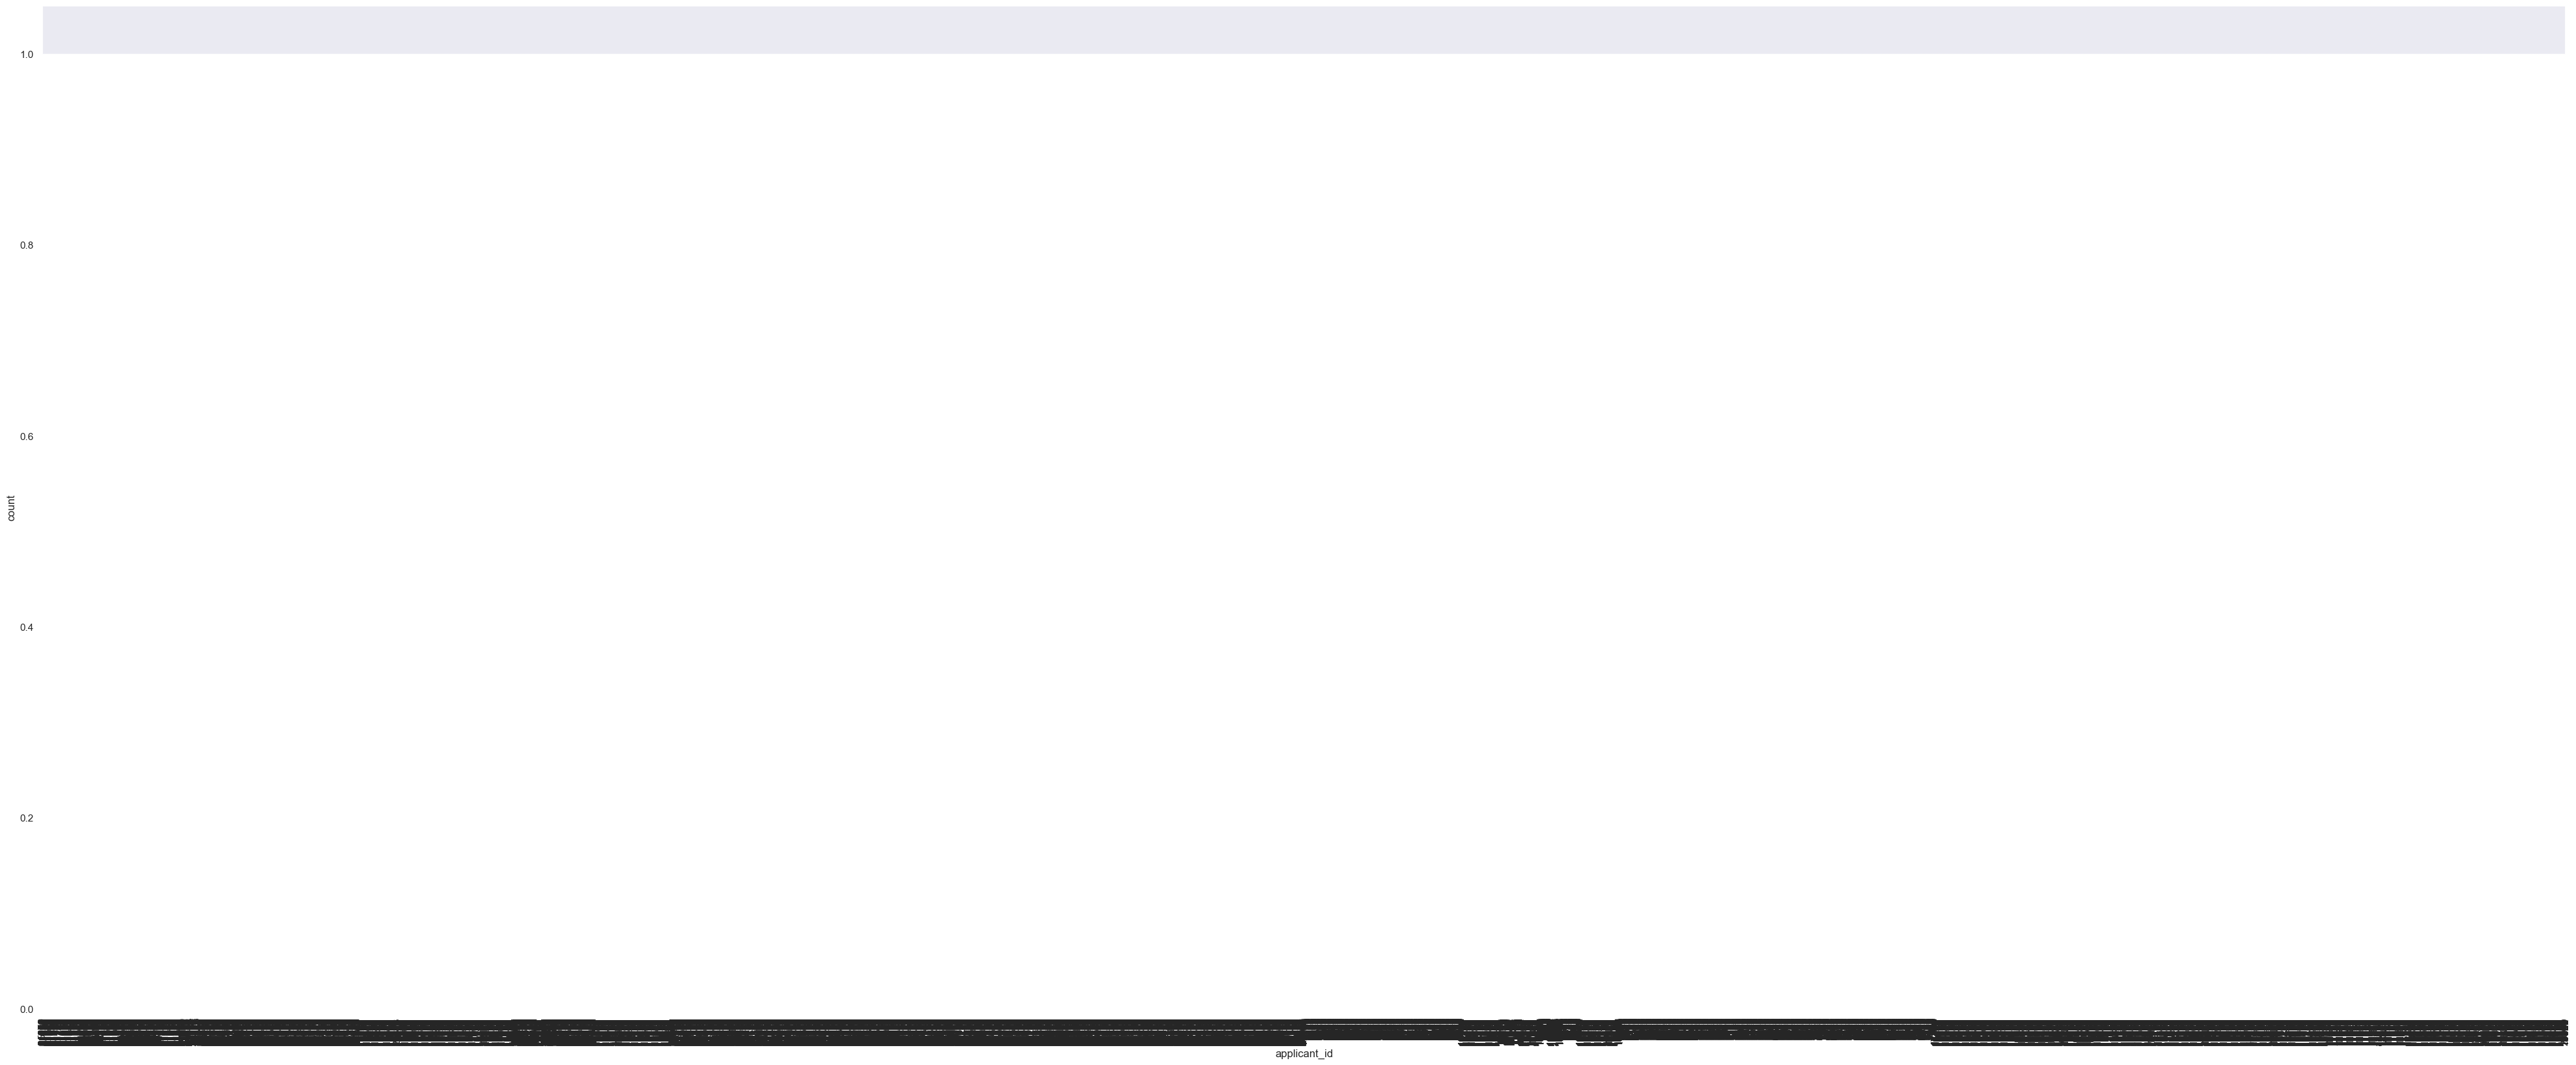

	
		Univariate Analysis of years_of_insurance_with_us
-----------------------------------------------------------
2. No of unique values in years_of_insurance_with_us are: 9. 
The distribution is as follows:
years_of_insurance_with_us
3    2990
8    2970
5    2941
0    2912
7    2873
1    2856
4    2846
6    2804
2    1808
Name: years_of_insurance_with_us, dtype: int64



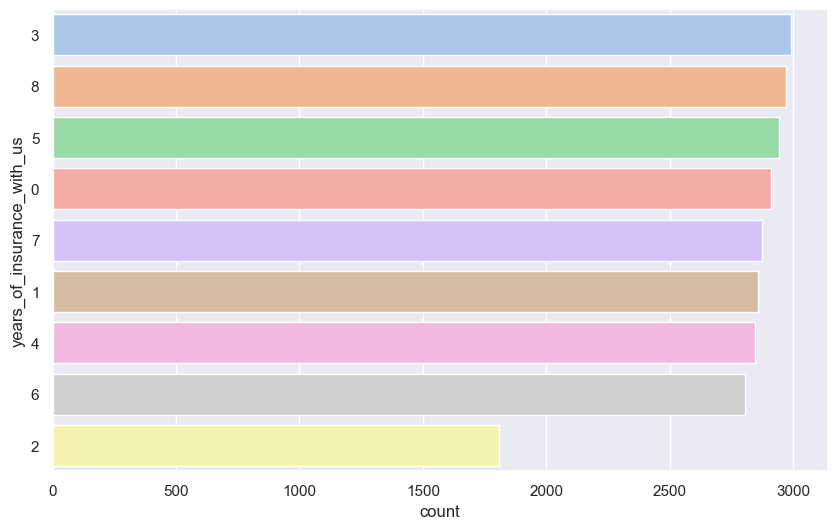

	
		Univariate Analysis of regular_checkup_lasy_year
-----------------------------------------------------------
3. No of unique values in regular_checkup_lasy_year are: 6. 
The distribution is as follows:
regular_checkup_lasy_year
0    15215
1     4644
2     2198
3     1818
4      777
5      348
Name: regular_checkup_lasy_year, dtype: int64



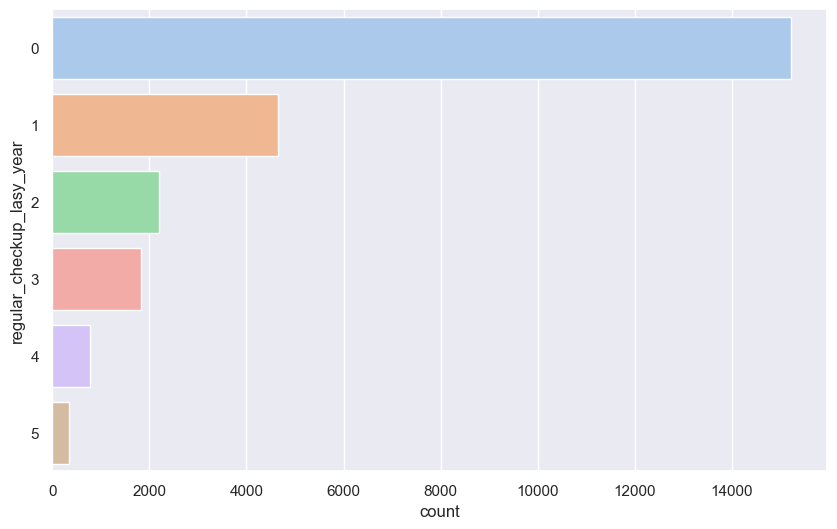

	
		Univariate Analysis of adventure_sports
-----------------------------------------------------------
4. No of unique values in adventure_sports are: 2. 
The distribution is as follows:
adventure_sports
0    22957
1     2043
Name: adventure_sports, dtype: int64



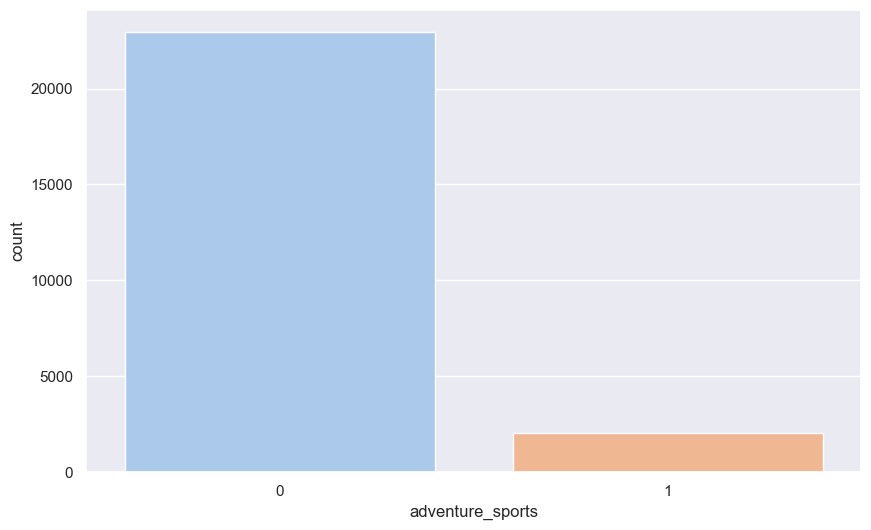

	
		Univariate Analysis of Occupation
-----------------------------------------------------------
5. No of unique values in Occupation are: 3. 
The distribution is as follows:
Occupation
Student     10169
Business    10020
Salried      4811
Name: Occupation, dtype: int64



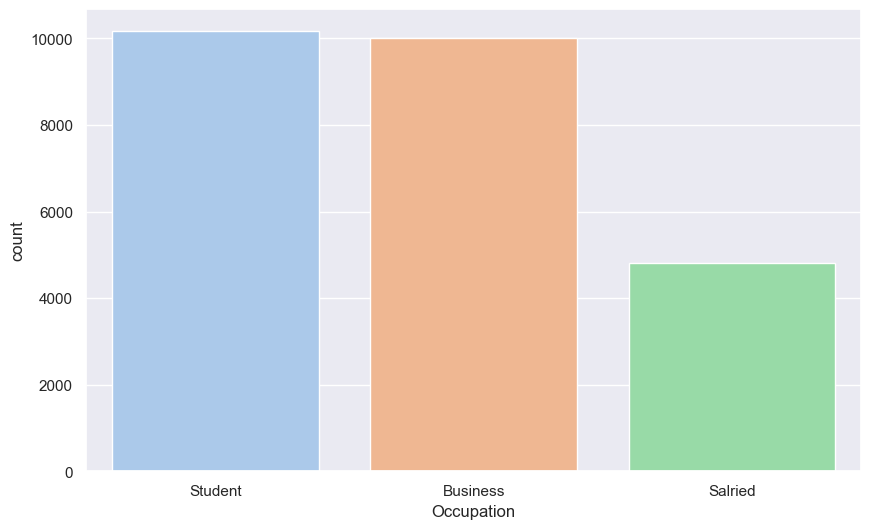

	
		Univariate Analysis of visited_doctor_last_1_year
-----------------------------------------------------------
6. No of unique values in visited_doctor_last_1_year are: 12. 
The distribution is as follows:
visited_doctor_last_1_year
2     8669
3     7094
4     6708
5     1265
6      546
1      432
7      189
8       76
9       13
10       6
12       1
0        1
Name: visited_doctor_last_1_year, dtype: int64



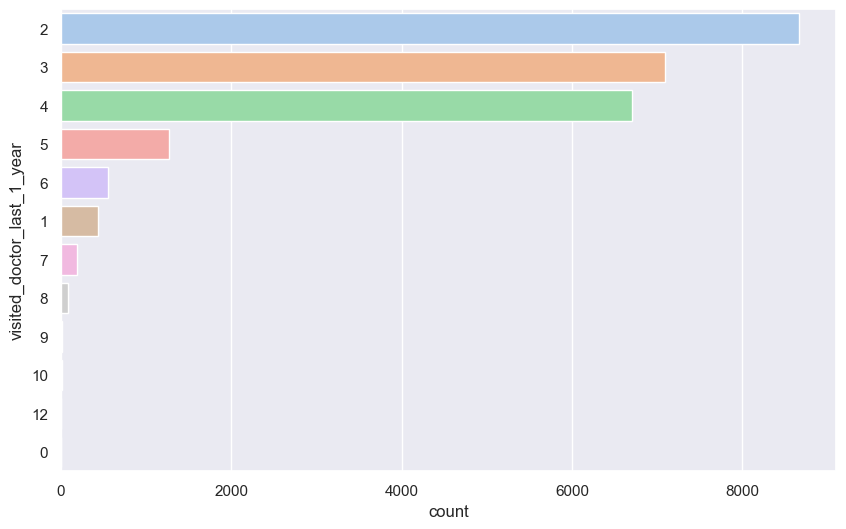

	
		Univariate Analysis of cholesterol_level
-----------------------------------------------------------
7. No of unique values in cholesterol_level are: 5. 
The distribution is as follows:
cholesterol_level
150 to 175    8763
125 to 150    8339
200 to 225    2963
175 to 200    2881
225 to 250    2054
Name: cholesterol_level, dtype: int64



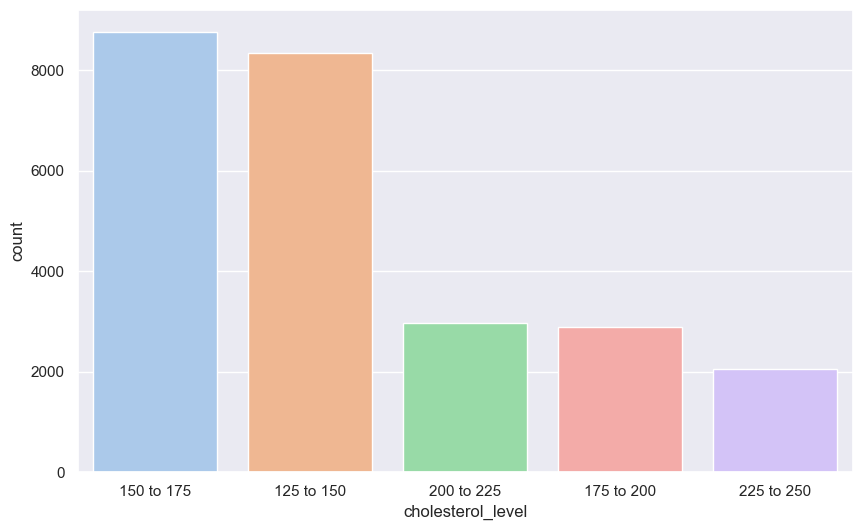

	
		Univariate Analysis of daily_avg_steps
-----------------------------------------------------------
8. No of unique values in daily_avg_steps are: 4914. 
The distribution is as follows:
daily_avg_steps
4870     25
4993     23
5051     22
5124     21
5017     21
         ..
2755      1
8193      1
9565      1
7855      1
10777     1
Name: daily_avg_steps, Length: 4914, dtype: int64



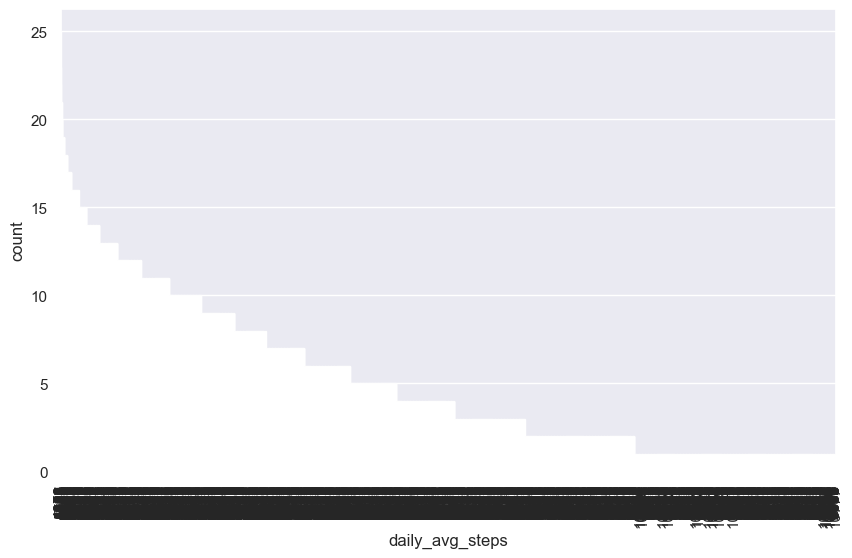

	
		Univariate Analysis of age
-----------------------------------------------------------
9. No of unique values in age are: 59. 
The distribution is as follows:
age
22    498
44    493
41    482
39    482
62    481
25    473
29    470
58    470
67    470
34    469
35    467
65    467
32    466
64    463
50    463
37    461
24    460
38    459
45    459
47    456
33    456
30    454
26    453
57    453
53    452
42    450
43    449
48    444
52    444
63    443
19    443
31    441
54    440
49    439
56    438
71    437
40    436
60    430
68    430
51    429
27    427
46    427
36    425
21    420
69    420
59    420
28    415
66    414
55    410
23    410
70    409
20    407
61    403
72    336
18    309
73    236
17    215
16    121
74    106
Name: age, dtype: int64



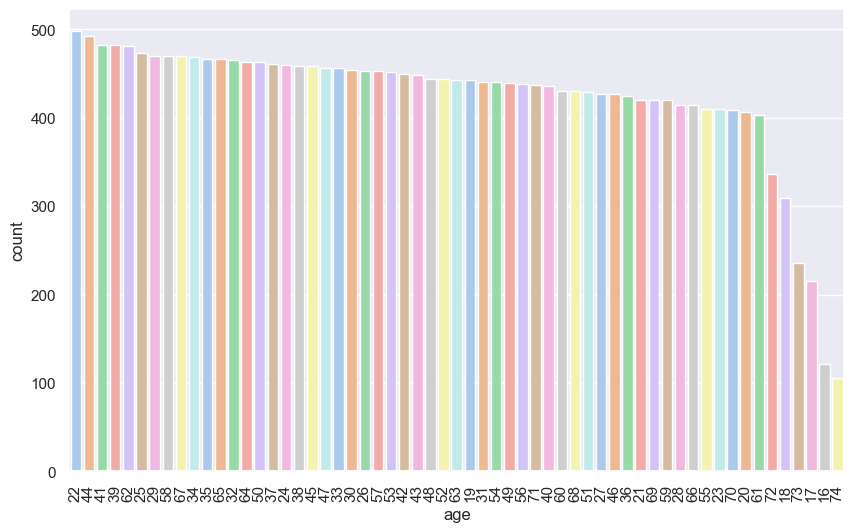

	
		Univariate Analysis of heart_decs_history
-----------------------------------------------------------
10. No of unique values in heart_decs_history are: 2. 
The distribution is as follows:
heart_decs_history
0    23634
1     1366
Name: heart_decs_history, dtype: int64



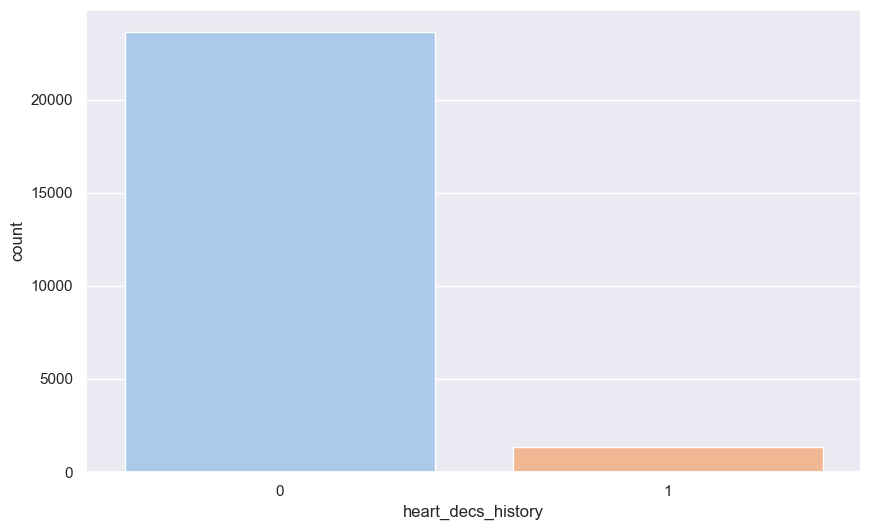

	
		Univariate Analysis of other_major_decs_history
-----------------------------------------------------------
11. No of unique values in other_major_decs_history are: 2. 
The distribution is as follows:
other_major_decs_history
0    22546
1     2454
Name: other_major_decs_history, dtype: int64



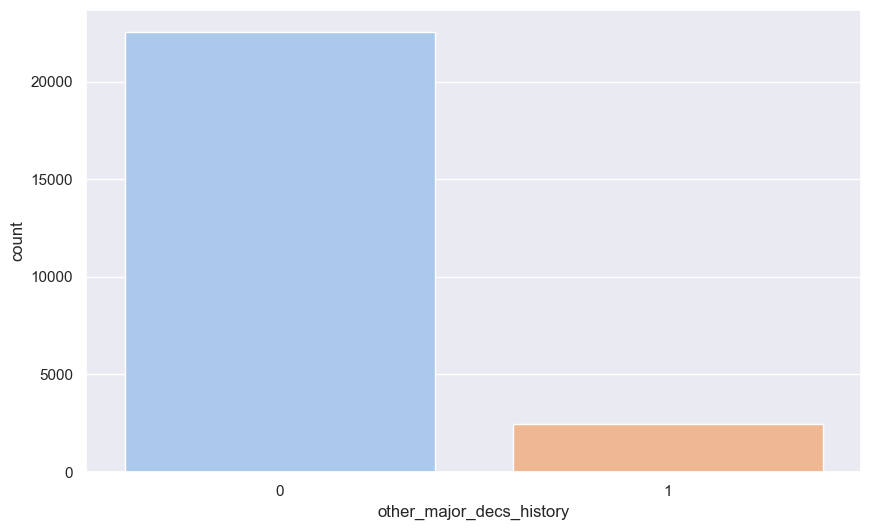

	
		Univariate Analysis of Gender
-----------------------------------------------------------
12. No of unique values in Gender are: 2. 
The distribution is as follows:
Gender
Male      16422
Female     8578
Name: Gender, dtype: int64



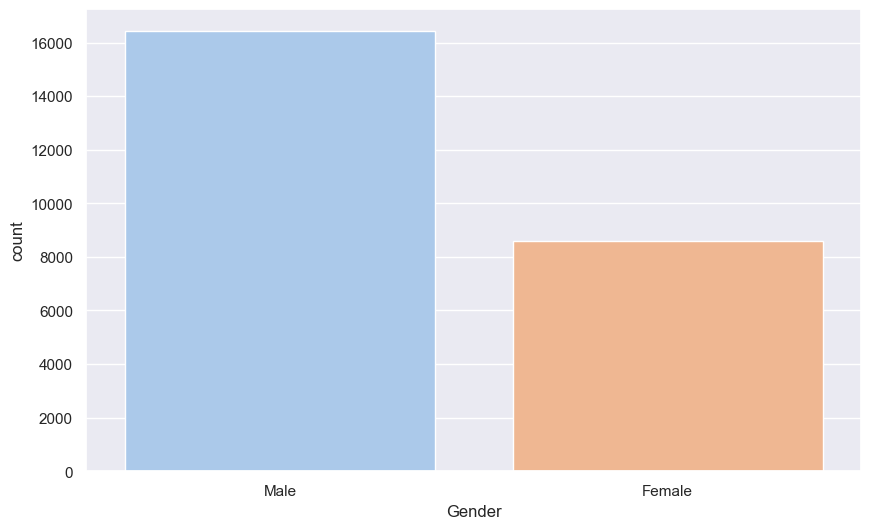

	
		Univariate Analysis of avg_glucose_level
-----------------------------------------------------------
13. No of unique values in avg_glucose_level are: 221. 
The distribution is as follows:
avg_glucose_level
243    143
138    140
88     135
273    135
97     134
      ... 
275     72
276     46
58      38
277     26
57      19
Name: avg_glucose_level, Length: 221, dtype: int64



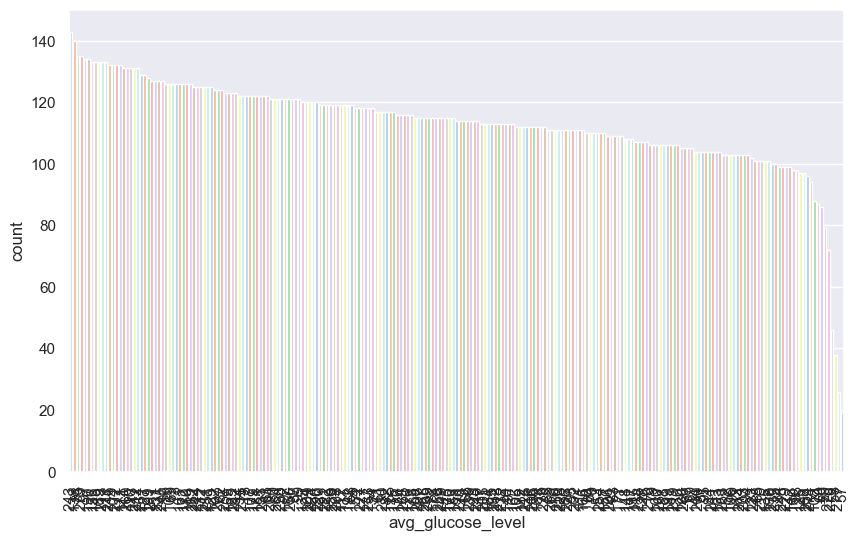

	
		Univariate Analysis of bmi
-----------------------------------------------------------
14. No of unique values in bmi are: 465. 
The distribution is as follows:
bmi
29.7    189
30.7    186
28.1    181
30.6    171
29.6    164
       ... 
15.3      1
52.1      1
50.7      1
59.5      1
64.2      1
Name: bmi, Length: 465, dtype: int64



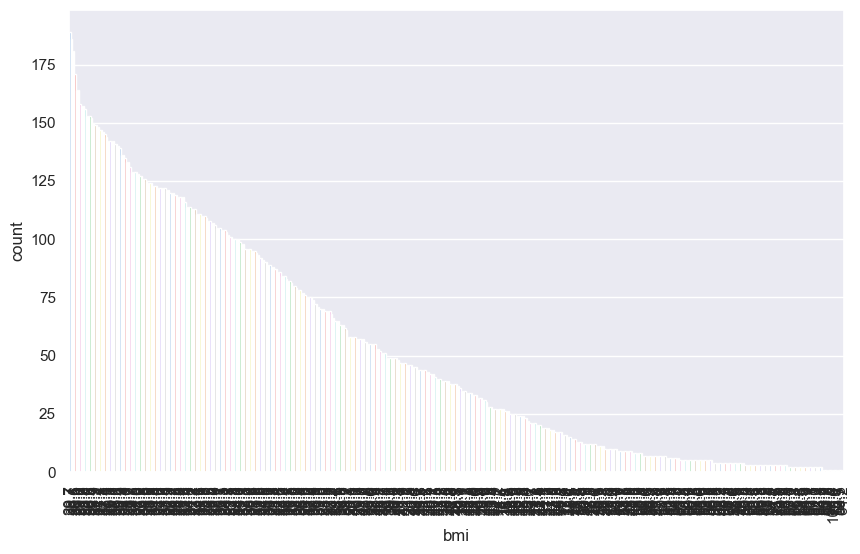

	
		Univariate Analysis of smoking_status
-----------------------------------------------------------
15. No of unique values in smoking_status are: 4. 
The distribution is as follows:
smoking_status
never smoked       9249
Unknown            7555
formerly smoked    4329
smokes             3867
Name: smoking_status, dtype: int64



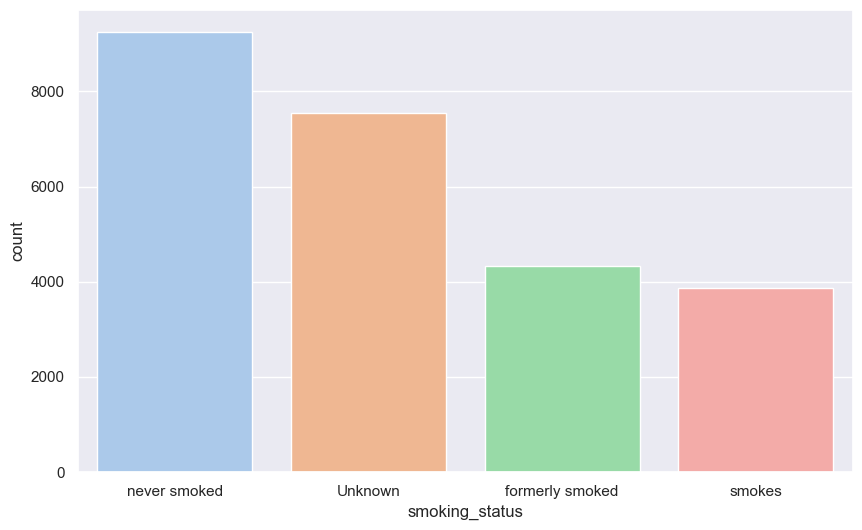

	
		Univariate Analysis of Year_last_admitted
-----------------------------------------------------------
16. No of unique values in Year_last_admitted are: 29. 
The distribution is as follows:
Year_last_admitted
2010.0    557
1995.0    538
2007.0    532
2002.0    520
2000.0    516
2013.0    516
1994.0    514
1998.0    514
1997.0    513
2009.0    512
1993.0    508
2001.0    507
2003.0    504
2008.0    503
1999.0    498
2014.0    496
2005.0    491
1996.0    487
2012.0    483
2004.0    481
2011.0    475
2006.0    472
2015.0    449
1992.0    382
2016.0    370
1991.0    276
2017.0    253
2018.0    130
1990.0    122
Name: Year_last_admitted, dtype: int64



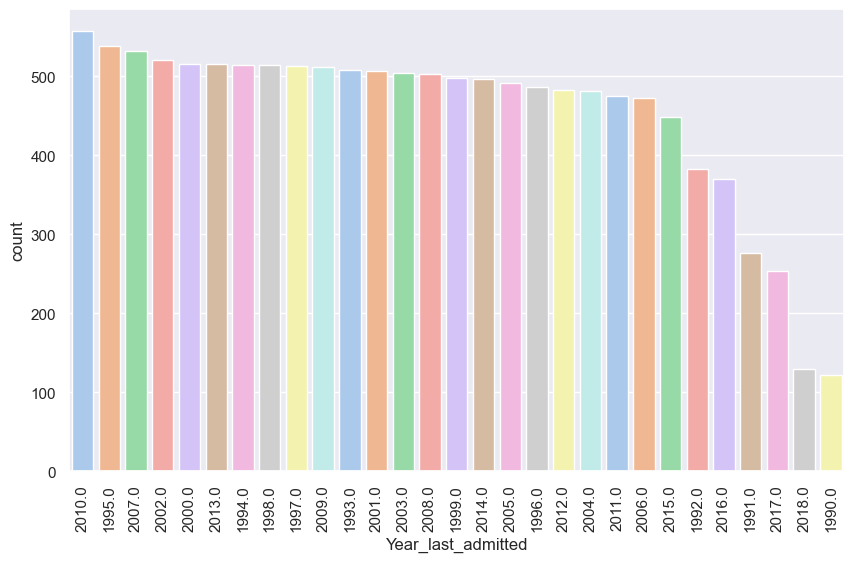

	
		Univariate Analysis of Location
-----------------------------------------------------------
17. No of unique values in Location are: 15. 
The distribution is as follows:
Location
Bangalore      1742
Jaipur         1706
Bhubaneswar    1704
Mangalore      1697
Delhi          1680
Ahmedabad      1677
Guwahati       1672
Chennai        1669
Kanpur         1664
Nagpur         1663
Mumbai         1658
Lucknow        1637
Pune           1622
Kolkata        1620
Surat          1589
Name: Location, dtype: int64



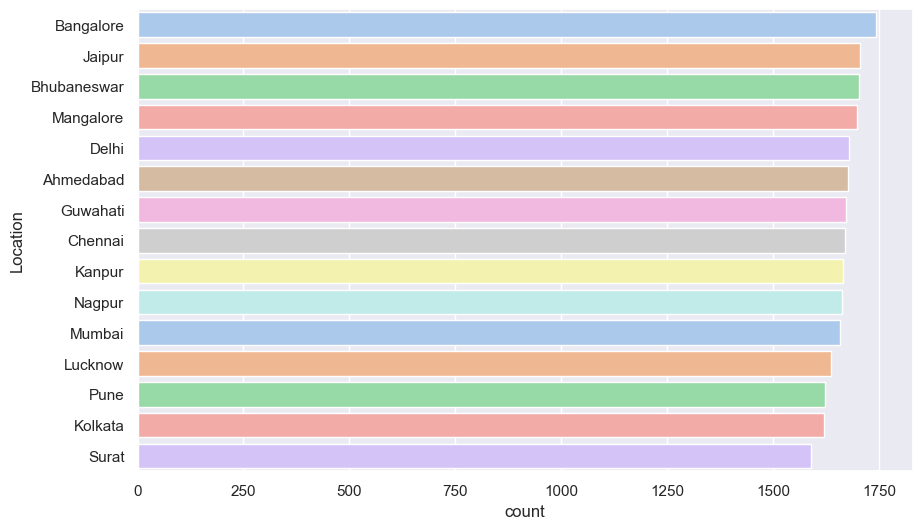

	
		Univariate Analysis of weight
-----------------------------------------------------------
18. No of unique values in weight are: 45. 
The distribution is as follows:
weight
77    1038
75    1003
78     970
76     969
71     946
72     934
73     927
79     919
70     912
80     896
74     887
68     858
61     818
62     799
66     789
69     759
67     752
81     751
60     734
63     718
59     697
65     685
64     633
82     603
57     575
58     574
83     402
56     359
84     343
86     310
85     304
87     270
88     240
89     231
90     206
91     196
52     167
55     156
54     144
92     127
53     121
93     116
94      83
95      62
96      17
Name: weight, dtype: int64



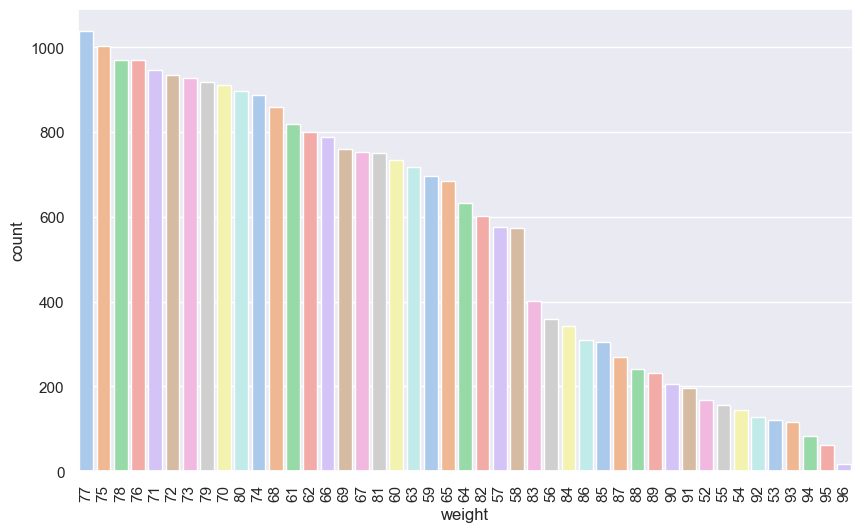

	
		Univariate Analysis of covered_by_any_other_company
-----------------------------------------------------------
19. No of unique values in covered_by_any_other_company are: 2. 
The distribution is as follows:
covered_by_any_other_company
N    17418
Y     7582
Name: covered_by_any_other_company, dtype: int64



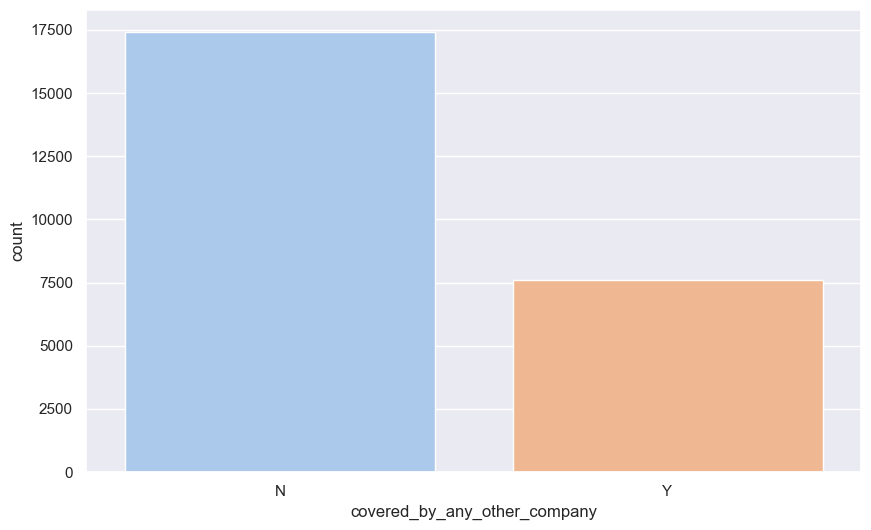

	
		Univariate Analysis of Alcohol
-----------------------------------------------------------
20. No of unique values in Alcohol are: 3. 
The distribution is as follows:
Alcohol
Rare     13752
No        8541
Daily     2707
Name: Alcohol, dtype: int64



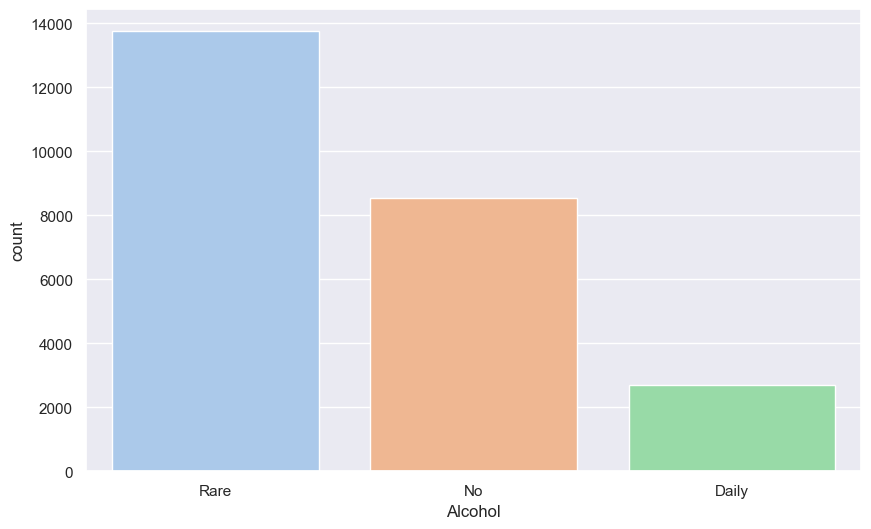

	
		Univariate Analysis of exercise
-----------------------------------------------------------
21. No of unique values in exercise are: 3. 
The distribution is as follows:
exercise
Moderate    14638
Extreme      5248
No           5114
Name: exercise, dtype: int64



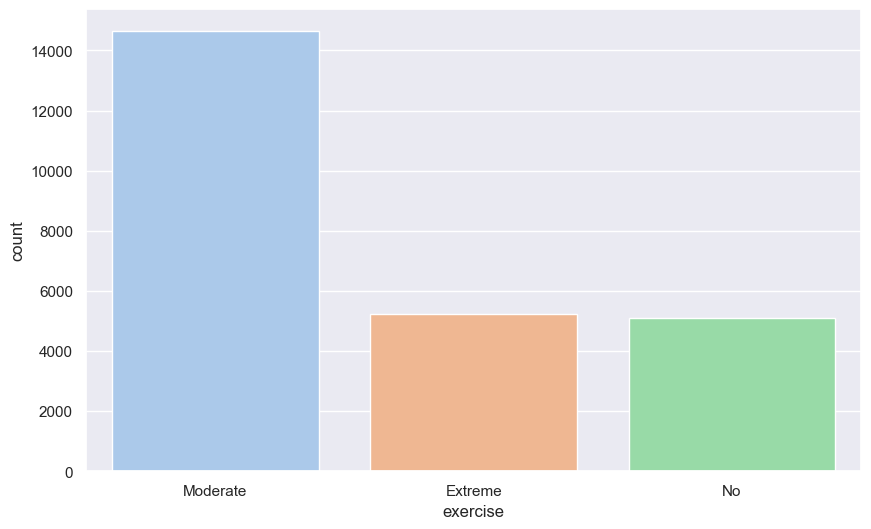

	
		Univariate Analysis of weight_change_in_last_one_year
-----------------------------------------------------------
22. No of unique values in weight_change_in_last_one_year are: 7. 
The distribution is as follows:
weight_change_in_last_one_year
4    5076
3    5006
2    4037
0    4012
1    3925
5    2036
6     908
Name: weight_change_in_last_one_year, dtype: int64



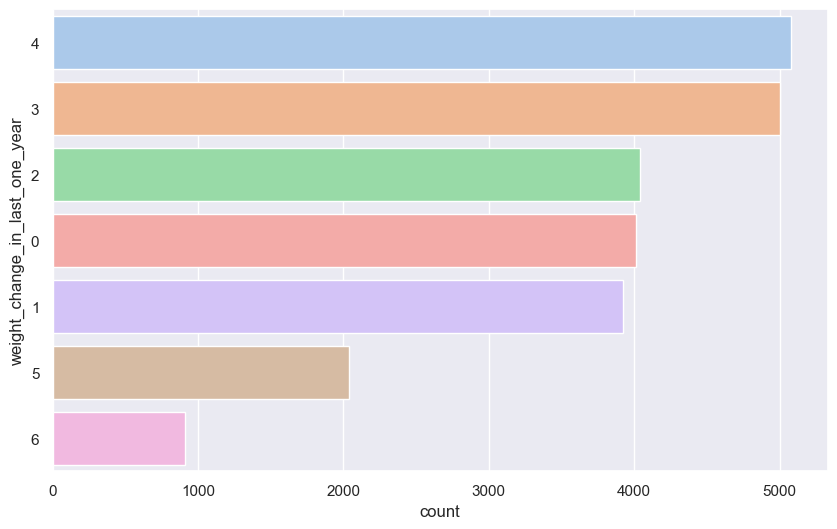

	
		Univariate Analysis of fat_percentage
-----------------------------------------------------------
23. No of unique values in fat_percentage are: 32. 
The distribution is as follows:
fat_percentage
36    2908
33    1828
29    1604
38    1465
24    1429
37    1277
16    1224
21    1160
22     947
42     940
19     932
39     901
20     899
35     884
25     689
31     649
34     628
11     550
27     497
13     438
12     431
23     429
40     404
41     362
32     309
18     276
15     250
28     217
26     201
30     108
14      99
17      65
Name: fat_percentage, dtype: int64



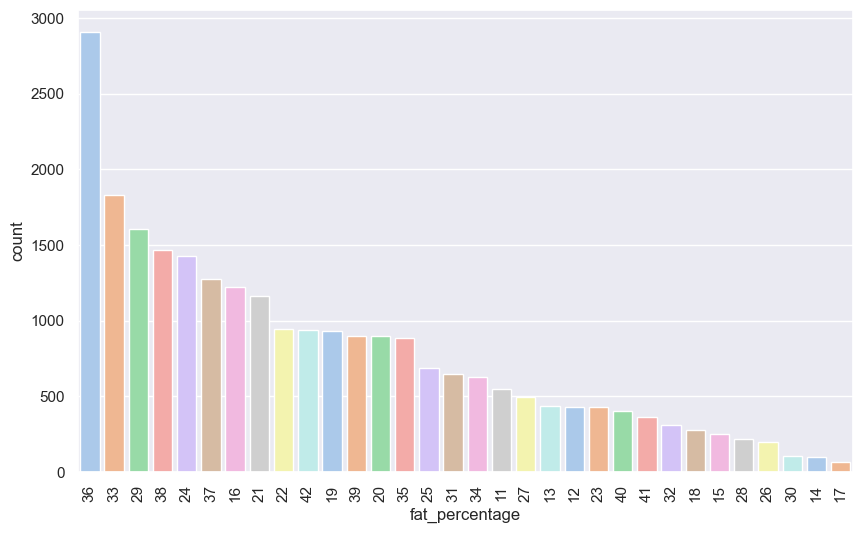

	
		Univariate Analysis of insurance_cost
-----------------------------------------------------------
24. No of unique values in insurance_cost are: 54. 
The distribution is as follows:
insurance_cost
7404     1214
38254     977
6170      970
8638      954
37020     869
34552     857
28382     845
35786     827
25914     779
29616     766
30850     743
9872      742
33318     733
39488     727
27148     719
20978     717
32084     677
24680     669
22212     658
17276     644
19744     637
23446     634
18510     615
16042     578
14808     569
40722     474
13574     454
11106     431
41956     389
12340     373
3702      309
43190     265
48126     259
46892     254
44424     253
49360     239
45658     233
50594     199
4936      197
53062     192
51828     177
54296     172
55530     152
59232     140
60466     137
56764     122
57998     113
62934      87
64168      77
61700      70
65402      56
66636      27
67870      17
2468       12
Name: insurance_cost, dtype: int64



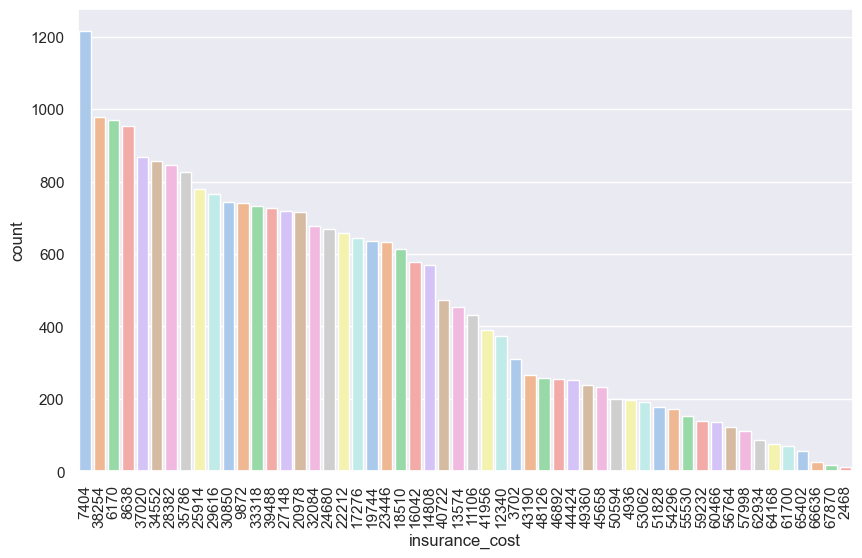

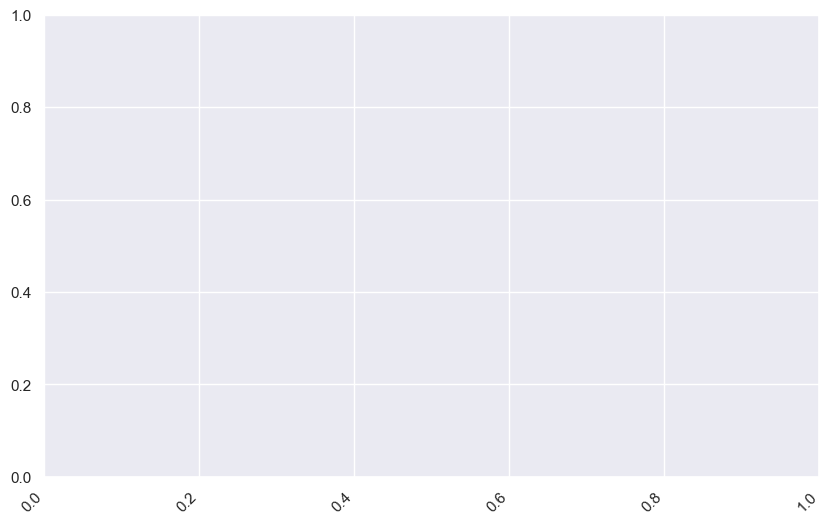

In [16]:
fig,ax = plt.subplots(figsize=(50,20))
for i,x in enumerate(df):
    if x not in ['cut']:
        univariate_analysis_categorical(x, i)  
        
plt.xticks(rotation=45, ha='right')
plt.show()

### b) Bivariate analysis (relationship between different variables , correlations)

<Figure size 3000x3000 with 0 Axes>

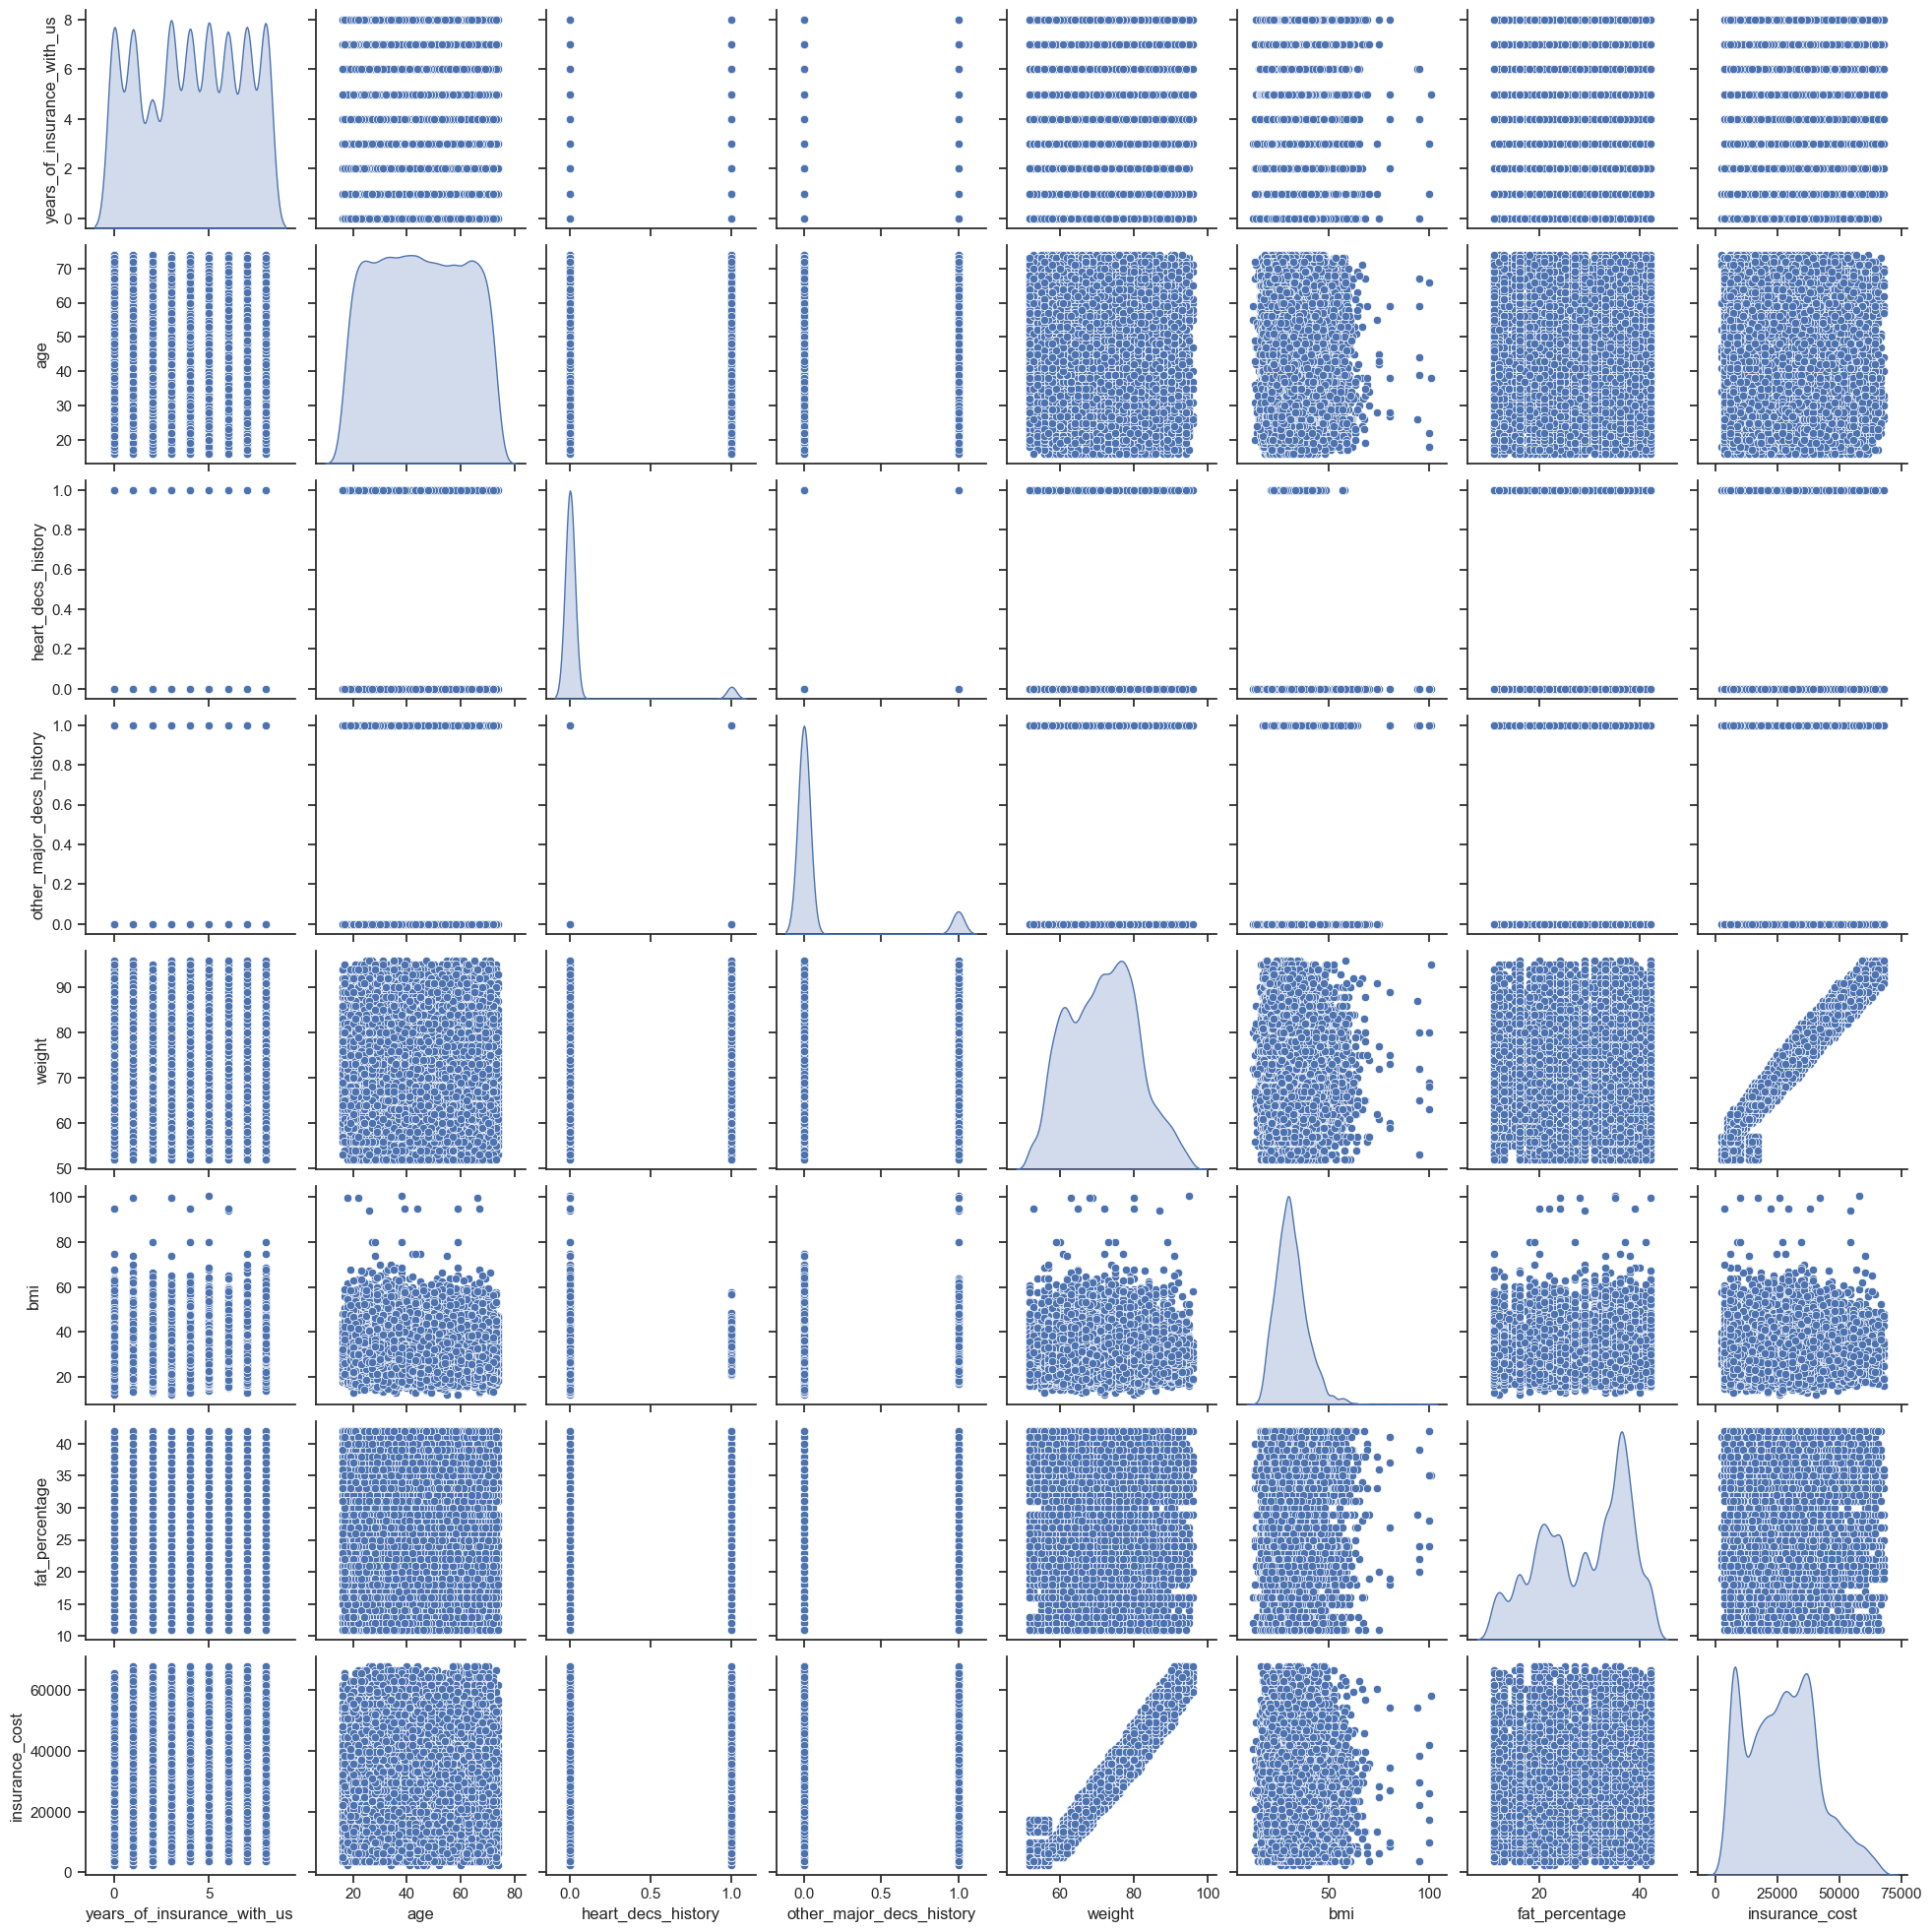

In [17]:
#Bivariate
selected_columns = ['years_of_insurance_with_us', 'age', 'heart_decs_history', 'other_major_decs_history', 'weight', 'bmi', 'fat_percentage', 'insurance_cost']

# Create a pair plot using seaborn
sns.set(style='ticks')  # Set the plot style
plt.figure(figsize=(30, 30))  # Set the figure size
sns.pairplot(df[selected_columns], diag_kind='kde')  # diag_kind='kde' for density plots on diagonals
plt.show()

### a) Removal of unwanted variables (if applicable)	 

In [18]:
unwanted_variables = ['Year_last_admitted']

# Drop the unwanted variables from the DataFrame
df = df.drop(columns=unwanted_variables)

In [19]:
df

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,...,bmi,smoking_status,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salried,2,125 to 150,4866,28,1,...,31.2,Unknown,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411,50,0,...,34.2,formerly smoked,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509,68,0,...,40.4,formerly smoked,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214,51,0,...,22.9,Unknown,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938,44,0,...,26.5,never smoked,Bangalore,74,N,No,Extreme,0,34,29616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,29995,3,0,0,Salried,4,225 to 250,5614,22,0,...,36.1,smokes,Kanpur,79,Y,Rare,Moderate,4,40,39488
24996,29996,6,0,0,Business,4,200 to 225,4719,58,0,...,31.3,never smoked,Kanpur,66,N,Rare,Moderate,2,28,14808
24997,29997,7,0,1,Student,2,150 to 175,5624,34,0,...,NaN,Unknown,Bhubaneswar,76,N,Rare,Moderate,1,35,33318
24998,29998,1,0,0,Salried,2,225 to 250,10777,27,0,...,26.6,Unknown,Surat,74,N,Rare,Moderate,0,40,30850


### b) Missing Value treatment (if applicable)	 

In [20]:
columns_with_missing = ['bmi']

# Fill missing values in 'bmi' column with mean
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [21]:
df.isnull().sum()

applicant_id                      0
years_of_insurance_with_us        0
regular_checkup_lasy_year         0
adventure_sports                  0
Occupation                        0
visited_doctor_last_1_year        0
cholesterol_level                 0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
Gender                            0
avg_glucose_level                 0
bmi                               0
smoking_status                    0
Location                          0
weight                            0
covered_by_any_other_company      0
Alcohol                           0
exercise                          0
weight_change_in_last_one_year    0
fat_percentage                    0
insurance_cost                    0
dtype: int64

### d) Outlier treatment (if required)	 

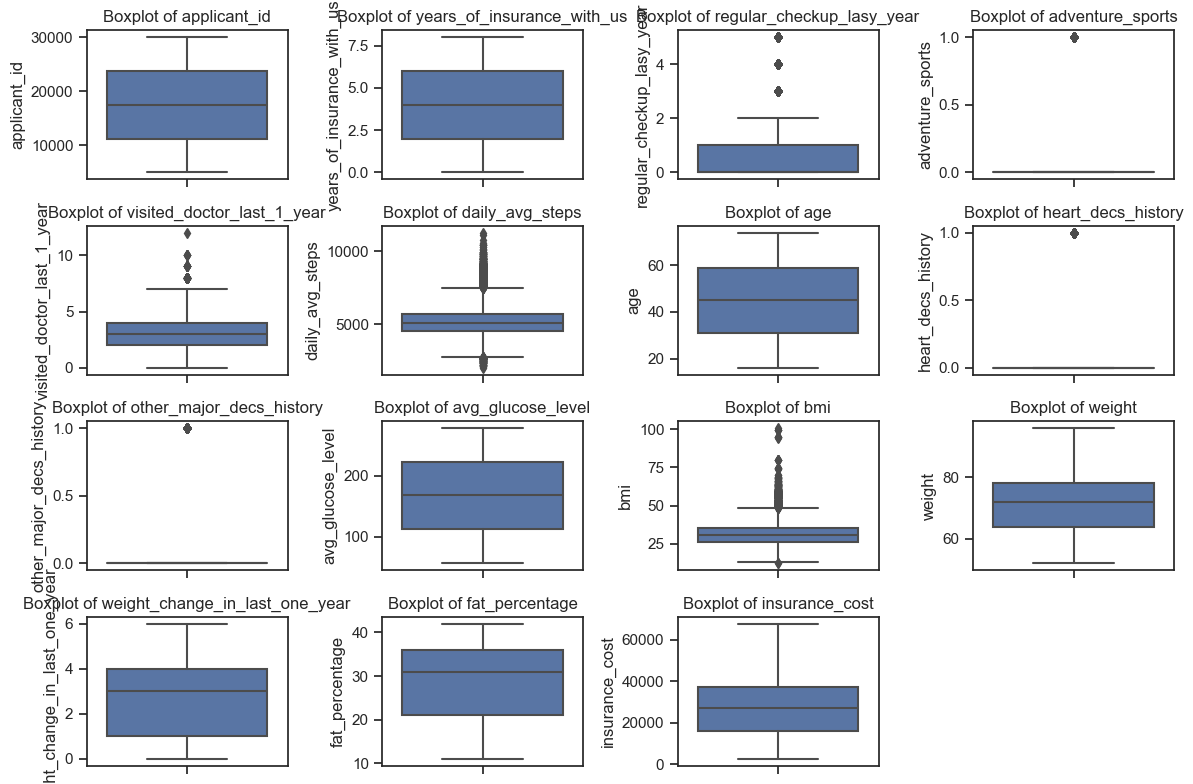

In [22]:
data=df = df.select_dtypes(include = ['float64', 'int64'])
plt.figure(figsize = (12,8))
feature_list = data.columns
for i in range(len(feature_list)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y = data[feature_list[i]], data = data)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [23]:
# Defining a funtion to remove outliers
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

In [24]:
for i in feature_list:
    LL, UL = remove_outlier(data[i])
    data[i] = np.where(data[i] > UL, UL, data[i])
    data[i] = np.where(data[i] < LL, LL, data[i])

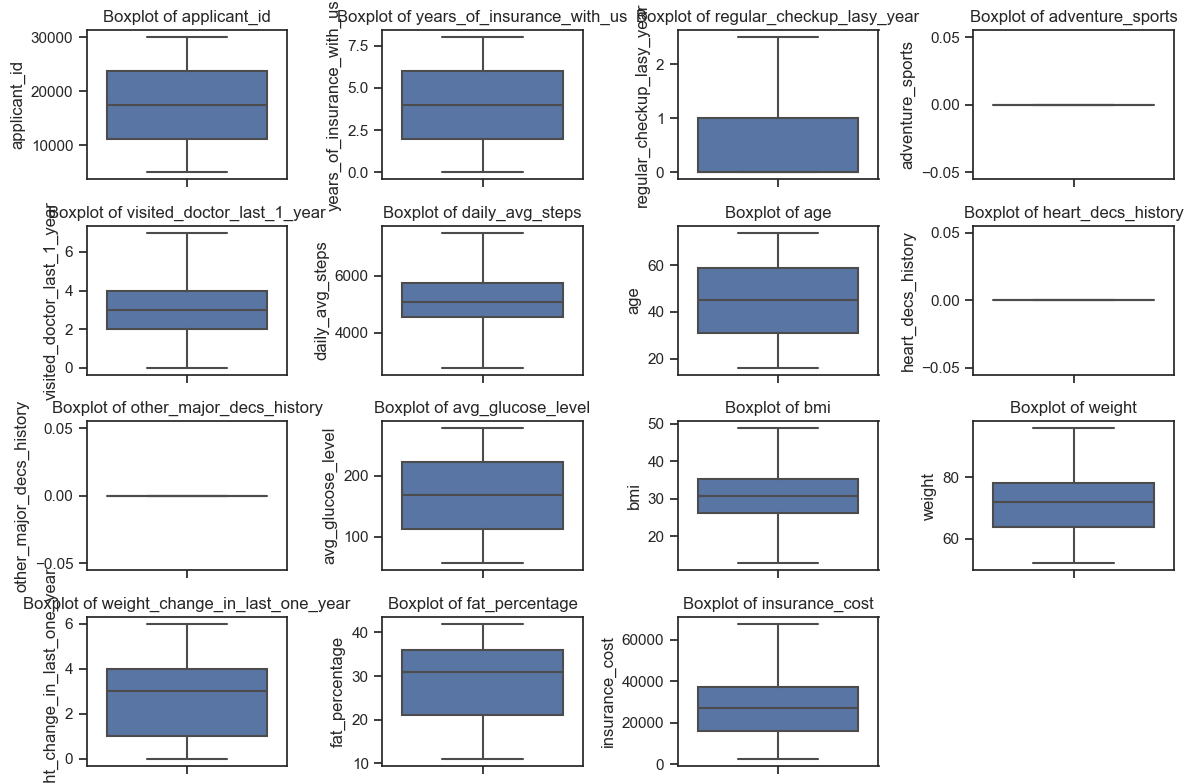

In [25]:
plt.figure(figsize = (12,8))
feature_list = data.columns
for i in range(len(feature_list)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y = data[feature_list[i]], data = data)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### e) Variable transformation (if applicable)	 

In [26]:
categorical_columns = ['covered_by_any_other_company', 'Gender']

In [27]:
print(df.columns)

Index(['applicant_id', 'years_of_insurance_with_us',
       'regular_checkup_lasy_year', 'adventure_sports',
       'visited_doctor_last_1_year', 'daily_avg_steps', 'age',
       'heart_decs_history', 'other_major_decs_history', 'avg_glucose_level',
       'bmi', 'weight', 'weight_change_in_last_one_year', 'fat_percentage',
       'insurance_cost'],
      dtype='object')
